In [5]:
import pandas as pd



In [54]:
google_data = pd.read_csv('C:/Users/srava/OneDrive/Documents/Capstone_2/googleplaystore.csv')

In [12]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [55]:
google_data.shape

(10841, 13)

In [56]:
google_data.info()  # Rating , Current Ver,  Android Ver are have missing valuse

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [57]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

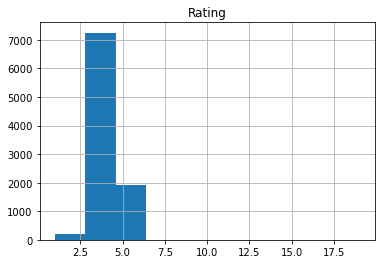

In [58]:
google_data.hist()

<AxesSubplot:>

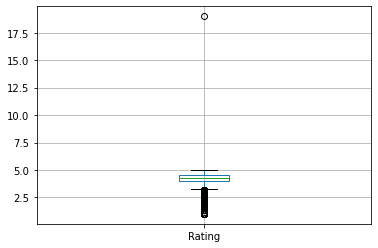

In [59]:
google_data.boxplot() # there is one outlier in Rating column  

In [60]:
google_data[google_data['Rating']>5] # rating > 5 is not making any sence so want to remove that

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [61]:
google_data.drop([10472], inplace =True) # droping the row has index number 10472, which has rating >5

In [62]:
google_data.shape

(10840, 13)

<AxesSubplot:>

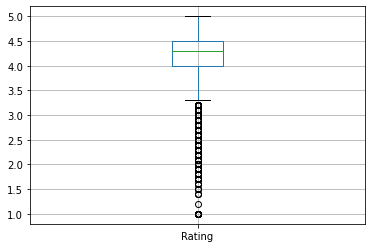

In [63]:
google_data.boxplot() # most of the rating values are in between 4, 4.5

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

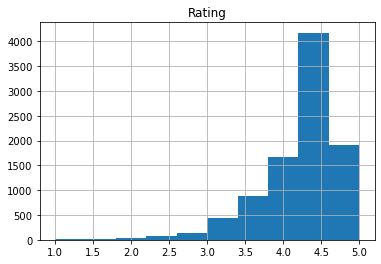

In [64]:
google_data.hist() # data is left skewed, so we need to replace the null values with median

In [65]:
threshold = len(google_data)*0.1
threshold

1084.0

In [66]:
google_data.dropna(thresh= threshold, axis = 1, inplace = True)

In [67]:
google_data.shape

(10840, 13)

In [68]:
google_data["Rating"] = google_data["Rating"].fillna(value=google_data["Rating"].median()) #fill null values with median

In [69]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [70]:
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object
